**1. train_neuralnet.py를 수정하여 다음 코드를 작성하시오. 학습률은 1로 잡으시오.**

**(i) 역전파를 통한 학습시간과 수치미분을 통한 학습 시간을 비교하려 한다. 훈련용 MNIST 데이터  앞 100개 배치 묶음에 대해 한번 학습에 걸린 시간을 time 라이브러리를 사용하여 측정하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.

import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet
import time

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

learning_rate = 1

x_train=x_train[:100]
t_train=t_train[:100]


start=time.time()
grad = network.gradient(x_train, t_train)
for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
print("역전파를 통한 학습시간 : "+str(time.time()-start))


start=time.time()
grad = network.numerical_gradient(x_train, t_train)
for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]
print("수치미분을 통한 학습시간 : "+str(time.time()-start))

역전파를 통한 학습시간 : 0.006004810333251953
수치미분을 통한 학습시간 : 33.550904273986816


**(ii) 은닉층의 뉴런 개수를 1개, 2개, 5개, 50개, 200개로 잡고 훈련을 시킨후 정확도를 측정하시오.**

가중치와 편향같은 파라미터는 데이터의 정보를 담는 슬롯의 역할을 합니다.
은닉층의 뉴런 개수가 많아 질수록 파라미터 숫자도 많아집니다.
데이터의 정보를 많이 담을 수 있어 정확도가 더 높습니다.
뇌의 신경세포 숫자가 많은 동물일수록 학습능력이 높은 것과 마찬가지이죠.

그렇다고 은닉층의 뉴런 개수를 한없이 늘릴수는 없습니다.
은닉층의 뉴런 개수가 많아질수록 학습시간이 오래 걸립니다.
학습할때 손실함수의 gradient를 구해야 하는데 손실함수의 변수인 파라미터 개수가 늘어났기 때문입니다.

또한, 은닉층의 뉴런 개수가 너무 많아지면 신경망이 중요한 정보 뿐만 아니라 비본질적인 정보까지 모두 담아내게 됩니다.
그래서 학습 데이터에서는 높은 정확도를 가지지만 테스트 데이터에 대해서는 정확도가 정체되거나 오히려 더 떨어지는 현상이 나타납니다.
이를 과적합이라 하고 딥러닝 II 8강에서 다룹니다.

====================은닉층 뉴런수 : 1====================
train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.2705166666666667, 0.266
train acc, test acc | 0.25048333333333334, 0.2452
train acc, test acc | 0.2971, 0.2973
train acc, test acc | 0.2598666666666667, 0.2595
train acc, test acc | 0.23011666666666666, 0.2245
train acc, test acc | 0.29018333333333335, 0.2862
train acc, test acc | 0.24106666666666668, 0.2398
train acc, test acc | 0.305, 0.3039
train acc, test acc | 0.2827, 0.277
train acc, test acc | 0.28123333333333334, 0.2818
train acc, test acc | 0.2728333333333333, 0.2717
train acc, test acc | 0.2889833333333333, 0.2929
train acc, test acc | 0.2682, 0.266
train acc, test acc | 0.2831, 0.2798
train acc, test acc | 0.26325, 0.2629
train acc, test acc | 0.26098333333333334, 0.2589


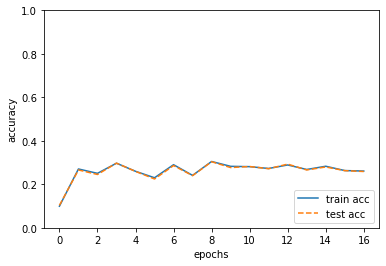

====================은닉층 뉴런수 : 2====================
train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.44521666666666665, 0.4447
train acc, test acc | 0.4588833333333333, 0.4602
train acc, test acc | 0.45535, 0.4445
train acc, test acc | 0.4801666666666667, 0.4856
train acc, test acc | 0.4718833333333333, 0.4691
train acc, test acc | 0.4003, 0.4018
train acc, test acc | 0.5216333333333333, 0.5127
train acc, test acc | 0.5261333333333333, 0.5214
train acc, test acc | 0.5044333333333333, 0.4943
train acc, test acc | 0.5057, 0.4967
train acc, test acc | 0.5231666666666667, 0.518
train acc, test acc | 0.52255, 0.5198
train acc, test acc | 0.47945, 0.4752
train acc, test acc | 0.47263333333333335, 0.4713
train acc, test acc | 0.4704, 0.464
train acc, test acc | 0.5106166666666667, 0.5027


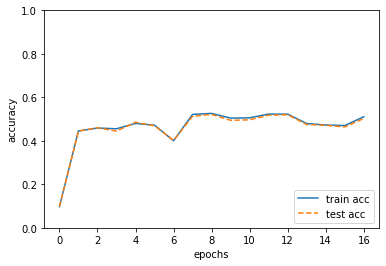

====================은닉층 뉴런수 : 5====================
train acc, test acc | 0.1046, 0.1056
train acc, test acc | 0.8453333333333334, 0.8494
train acc, test acc | 0.8622166666666666, 0.861
train acc, test acc | 0.8774666666666666, 0.8756
train acc, test acc | 0.8819, 0.877
train acc, test acc | 0.88665, 0.8821
train acc, test acc | 0.86255, 0.8605
train acc, test acc | 0.8762166666666666, 0.8701
train acc, test acc | 0.8612833333333333, 0.8608
train acc, test acc | 0.8893666666666666, 0.883
train acc, test acc | 0.8869833333333333, 0.8808
train acc, test acc | 0.88525, 0.8777
train acc, test acc | 0.8854, 0.8819
train acc, test acc | 0.8843833333333333, 0.8791
train acc, test acc | 0.88565, 0.8774
train acc, test acc | 0.8887, 0.8809
train acc, test acc | 0.8855, 0.8824


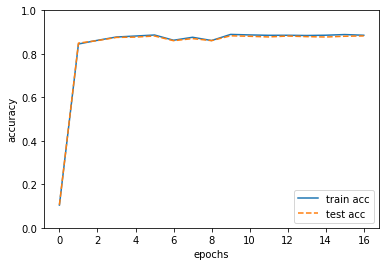

====================은닉층 뉴런수 : 50====================
train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.9282166666666667, 0.9288
train acc, test acc | 0.9487333333333333, 0.9469
train acc, test acc | 0.9541333333333334, 0.9483
train acc, test acc | 0.9657166666666667, 0.9606
train acc, test acc | 0.97, 0.9648
train acc, test acc | 0.9714833333333334, 0.965
train acc, test acc | 0.975, 0.9677
train acc, test acc | 0.9775333333333334, 0.9682
train acc, test acc | 0.9792166666666666, 0.969
train acc, test acc | 0.9816833333333334, 0.9705
train acc, test acc | 0.9822, 0.9705
train acc, test acc | 0.9835166666666667, 0.9711
train acc, test acc | 0.9852333333333333, 0.9724
train acc, test acc | 0.9847333333333333, 0.9705
train acc, test acc | 0.98735, 0.9738
train acc, test acc | 0.9879, 0.9732


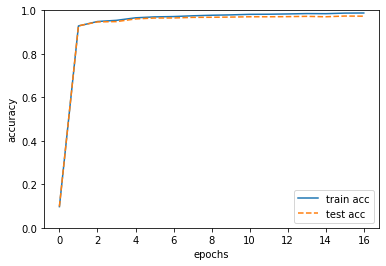

====================은닉층 뉴런수 : 100====================
train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.9292166666666667, 0.9317
train acc, test acc | 0.9497833333333333, 0.9504
train acc, test acc | 0.96155, 0.9578
train acc, test acc | 0.9638333333333333, 0.96
train acc, test acc | 0.9722833333333334, 0.9633
train acc, test acc | 0.97415, 0.967
train acc, test acc | 0.97865, 0.9691
train acc, test acc | 0.9817333333333333, 0.972
train acc, test acc | 0.9829, 0.9729
train acc, test acc | 0.9855, 0.9735
train acc, test acc | 0.9876333333333334, 0.976
train acc, test acc | 0.9877333333333334, 0.9756
train acc, test acc | 0.9900333333333333, 0.9753
train acc, test acc | 0.9909, 0.9761
train acc, test acc | 0.9915666666666667, 0.9759
train acc, test acc | 0.9931, 0.9764


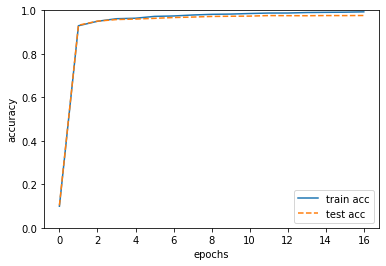

In [3]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

hidden_size = [1,2,5,50,100]

for i in hidden_size:
    print("="*20+"은닉층 뉴런수 : "+str(i)+"="*20)
    
    network = TwoLayerNet(input_size=784, hidden_size=i, output_size=10)

    # 하이퍼파라미터
    iters_num = 10000  # 반복 횟수를 적절히 설정한다.
    train_size = x_train.shape[0]
    batch_size = 100   # 미니배치 크기
    learning_rate = 1

    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    # 1에폭당 반복 수
    iter_per_epoch = max(train_size / batch_size, 1)

    for i in range(iters_num):
        # 미니배치 획득
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # 기울기 계산
        #grad = network.numerical_gradient(x_batch, t_batch)
        grad = network.gradient(x_batch, t_batch)

        # 매개변수 갱신
        for key in ('W1', 'b1', 'W2', 'b2'):
            network.params[key] -= learning_rate * grad[key]

        # 학습 경과 기록
        loss = network.loss(x_batch, t_batch)
        train_loss_list.append(loss)

        # 1에폭당 정확도 계산
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            test_acc = network.accuracy(x_test, t_test)
            train_acc_list.append(train_acc)
            test_acc_list.append(test_acc)
            print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

    # 그래프 그리기
    markers = {'train': 'o', 'test': 's'}
    x = np.arange(len(train_acc_list))
    plt.plot(x, train_acc_list, label='train acc')
    plt.plot(x, test_acc_list, label='test acc', linestyle='--')
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.ylim(0, 1.0)
    plt.legend(loc='lower right')
    plt.show()

**(iii) 학습 회수를 100,000회로  잡고 훈련을 시킨후 훈련 데이터 정확도와 테스트 데이터의 정확도를 측정해 비교하시오. (learning rate=1로 잡으시오.)**

시험공부를 오래 할수록 시험성적이 더 잘 나오겠지요.
신경망도 마찬가지입니다.
학습을 오래시키면 정확도가 더 올라갑니다.
하지만 학습을 너무 오래 시키면 신경망이 학습데이터의 중요한 정보뿐 아니라 비본질적인 정보도 담아내게 됩니다.
학습 데이터에 대해서는 높은 정확도로 맞추지만 테스트 데이터에 대해서는 정확도가 정체되거나 오히려 더 떨어지는 일이 발생하지요.
이를 과적합이라 하고 딥러닝 II 8강에서 다룹니다.

train acc, test acc | 0.18416666666666667, 0.1841
train acc, test acc | 0.9253166666666667, 0.9279
train acc, test acc | 0.9491, 0.9497
train acc, test acc | 0.9590166666666666, 0.9554
train acc, test acc | 0.9663333333333334, 0.9609
train acc, test acc | 0.9698, 0.9634
train acc, test acc | 0.9730833333333333, 0.9653
train acc, test acc | 0.9761833333333333, 0.969
train acc, test acc | 0.97865, 0.968
train acc, test acc | 0.9788, 0.9691
train acc, test acc | 0.9814333333333334, 0.97
train acc, test acc | 0.984, 0.9704
train acc, test acc | 0.9854333333333334, 0.9714
train acc, test acc | 0.9864833333333334, 0.9715
train acc, test acc | 0.98685, 0.9721
train acc, test acc | 0.9875833333333334, 0.9719
train acc, test acc | 0.9882833333333333, 0.9736
train acc, test acc | 0.9899833333333333, 0.9726
train acc, test acc | 0.99075, 0.9733
train acc, test acc | 0.991, 0.9738
train acc, test acc | 0.9907666666666667, 0.9738
train acc, test acc | 0.9918833333333333, 0.9744
train acc, test acc 

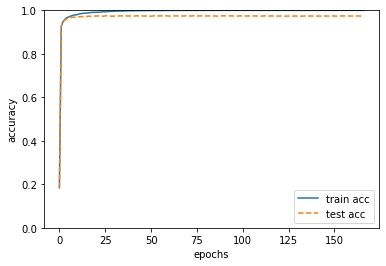

In [4]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 100000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 1

train_loss_list = []
train_acc_list = []
test_acc_list = []

# 1에폭당 반복 수
iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 매개변수 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    # 학습 경과 기록
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 1에폭당 정확도 계산
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

**2. 머신러닝 기법으로 AND 게이트를 학습시키려 한다.  입력 뉴런이 2개, 출력 뉴런이 1개이고 Affine층만으로 이루어진 신경망을 생각하자. 입력 데이터가 $(x_1, x_2)$이면 출력값은
$$
y = \begin{pmatrix} x_1 & x_2 \end{pmatrix} \begin{pmatrix} w_1 \\ w_2 \end{pmatrix} +b
= w_1 x_1 + w_2 x_2 +b
$$
이다.
신경망은 출력값이 1에 가까우면 True로, 0에 가까우면 False로 판단한다.
라벨이 $t$일 때, 손실함수는 ${1 \over 2}(y-t)^2$로 잡자.
가중치는 표준정규분포를 따라 랜덤하게, 편향은 0으로 초기화한후 8번 학습시킨다.
다음 그림과 같이 출력되도록 코드를 작성하시오.**

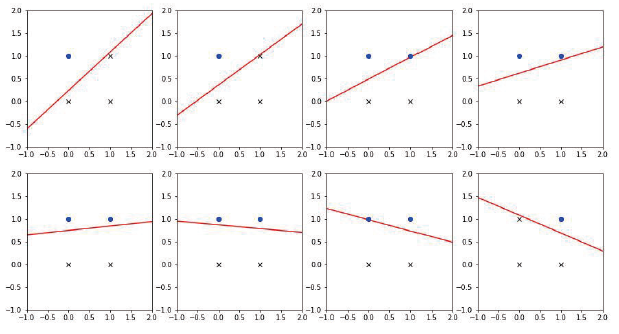

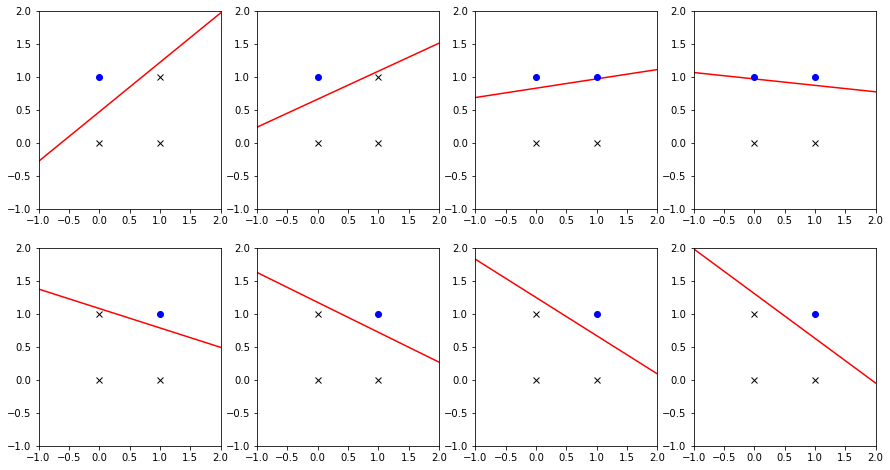

In [5]:
from ch04.gradient_2d import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,1)
        self.b = np.zeros(1)

    def predict(self, x):
        return np.dot(x, self.W) + self.b

    def loss(self, x, t):
        y = self.predict(x)
        loss = 0.5*np.mean((y - t)**2)

        return loss

x = np.array([[1,1],[1,0],[0,1],[0,0]])
t = np.array([[1],[0],[0],[0]])

net = simpleNet()

f = lambda w: net.loss(x, t)

plt.figure(figsize=(15,8))
for step in range(8):
    dW = numerical_gradient(f, net.W)
    net.W -= dW
    db = numerical_gradient(f, net.b)
    net.b -= db
    threshold = 0.5
    plt.subplot(2,4,step+1)
    x1 = np.array([-2,2])
    x2 = - net.W[0] /  net.W[1] * x1 + (threshold - net.b) / net.W[1]
    plt.plot(x1, x2, "-r")
    predictions = net.predict(x)
    mask_true = (predictions.flatten()>threshold)
    x_true = x[mask_true]
    plt.plot(x_true[:, 0], x_true[:, 1], 'bo')
    mask_false = (predictions.flatten()<threshold)
    x_false = x[mask_false]
    plt.plot(x_false[:, 0], x_false[:, 1], 'kx')
    plt.xlim(-1,2)
    plt.ylim(-1,2)
plt.show()

$y = w_1 x_1 + w_2 x_2 +b$가 1과 가까울때 True, 0과 가까울때 Flase로 판단하므로 임계값은 0.5입니다.  
따라서, 경계를 나타내는 직선은
$$
w_1 x_1 + w_2 x_2 +b = 0.5
$$
입니다.  
그림을 그리기 위해 표준형으로 정리하면
$$
x_2 = -{w_1 \over w_2} x_1 + {0.5 - b \over w_2}
$$
입니다.